# Finding the Best Markets to Advertise In

- The organization: an e-learning compnay that offers courses on programming including, web and mobile development, data science, game development, etc.
- Goal: Identifing the best markets to promote for e-learning compnay
- Data: [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969)

freeCodeCamp is a free e-learning plaform that offers courses on web development. Because they run a popular Medium pulbication(over 400,000 followers), their sruvey attracted new coders with varying interests(not only web development), which is ideal for the purpose of our analysis.

The suvery data is publicly available in [this GitHub reporsitory](https://github.com/freeCodeCamp/2017-new-coder-survey)

## Understanding the Data

In [1]:
import pandas as pd

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)

In [2]:
print(data.shape)
data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 18,175 records and 136 columns.

The data set appears to have various relevent about our potential markets including demographic, interests, and their skill level. There are limitations of course to use this data. This probably isn't the perfect dataset for our analysis, but it's reletively well organized and cost nothing. In stead of putting huge money in the initial analysis, it's better to use free or cheap dataset that is available and see if that could fulfill our goal. 

The dataset is available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).



## Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before we go any further, we need to make sure this dataset is representative for our population of interest and it has the right categories of people for our purpose.

### JobRoleInterest Column

The JobRoleInterest column describes for every participant the role(s) they'd be interested in working, which can tell us whether if they are right target people to analyze. Let's look at how the sample is consist of.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data['JobRoleInterest'].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                                       0.117706
  Front-End Web Developer                                                                                                                                                      0.064359
  Data Scientist                                                                                                                                                               0.021739
Back-End Web Developer                                                                                                                                                         0.020309
  Mobile Developer                                                                                                                                                             0.016733
Game Developer                                                                  

Most people are interested in more than one subject. Our platfor focuses on web and mobile development. Let's see how many people are interested in those area. Luckily the column appears to be consistent on its spelling. 


In [5]:
web_bool = data['JobRoleInterest'].str.contains('Web',na = False)
mobile_bool = data['JobRoleInterest'].str.contains('Mobile',na = False)
data.loc[web_bool | mobile_bool, 'JobRoleInterest'].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                                                                                       0.136394
  Front-End Web Developer                                                                                                                                                                                                      0.074577
Back-End Web Developer                                                                                                                                                                                                         0.023533
  Mobile Developer                                                                                                                                                                                                             0.019390
Full-Stack Web Developer,   Front-End Web Developer                     

It's difficult to tell how many people are interested in web and movile development with how the column is laid out at the moment. We are going to clean it up and create new columns that indicate whether they are interested in web and mobile development. 

In [6]:
data['Web'] = data['JobRoleInterest'].str.contains('Web',na = False)
data['Mobile'] = data['JobRoleInterest'].str.contains('Mobile',na = False)
data['Web_Mobile'] = data['JobRoleInterest'].str.contains('Web',na = False) | \
                        data['JobRoleInterest'].str.contains('Mobile',na = False)

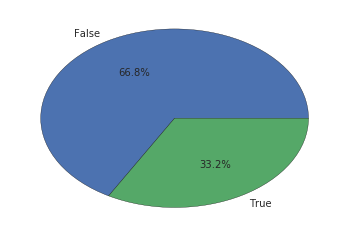

In [7]:
data['Web_Mobile'].value_counts(normalize = True).plot.pie(autopct='%.1f%%')
plt.ylabel('')

Now we found out that more than 33% of people are interested in either or both web and mobile development. This seems to be a well mix of groups to find out what are the features of people who are interested in web and mobile development. 

## New Coders - Location and Densities

The data set provides information about the location of each participant at a country level. The **CountryCitizen** variable describes the country of origin for each participant, and the **CountryLive** variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the **CountryLive** variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because geographic information is provided on a country level, we should consider that each country as an individual market. 

To make it easier, we are going to drop the rows that don't have values in 'JobRoleInterest'.

In [8]:
data = data[~(data['JobRoleInterest'].isnull())]

In [9]:
data[(data['JobRoleInterest'].isnull())].shape

(0, 139)

We can see the rows don't have values for 'JobRoleInterest' are now excluded.

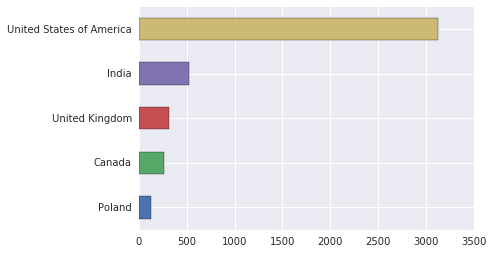

In [10]:
data['CountryLive'].value_counts().head().sort_values(ascending = True).plot.barh()

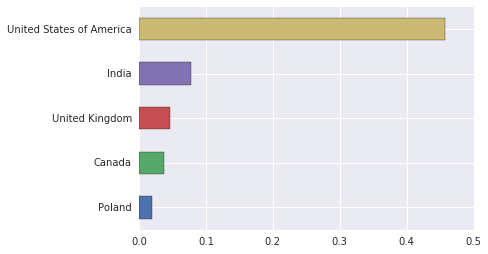

In [11]:
data['CountryLive'].value_counts(normalize = True).head().sort_values(ascending = True).plot.barh()

You can see from the result above, the USA, India, the UK, Canada, and Poland are where most of respondents came from. Based on this result, it's probably the best to invest into those countries. However, let's dig deeper into the dataset and if there are any other potential ways to look at it. 

## Spending Money for Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [12]:
data = data[data['CountryLive'].isin(['United States of America', 'United Kingdom','India','Canada'])]

### Money Spent per Month

Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [13]:
data.loc[data['MonthsProgramming'] == 0, 'MonthsProgramming'] = 1

In [14]:
data['MoneyPerMonth'] = data['MoneyForLearning']/data['MonthsProgramming']

In [15]:
data.shape

(4228, 140)

In [16]:
data['MoneyPerMonth'].isnull().sum()

313

There are 121 records that have null value in 'MoneyPerMonth' columns. Removing these rows.

In [17]:
data = data[~(data['MoneyPerMonth'].isnull())]

In [18]:
data.shape

(3915, 140)

In [19]:
data['MoneyPerMonth'].describe()

count     3915.000000
mean       196.990196
std       1701.091730
min          0.000000
25%          0.000000
50%          2.000000
75%         40.000000
max      80000.000000
Name: MoneyPerMonth, dtype: float64

In [20]:
data[['CountryLive','MoneyPerMonth']].groupby(['CountryLive']).mean()

,MoneyPerMonth
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,227.997996


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



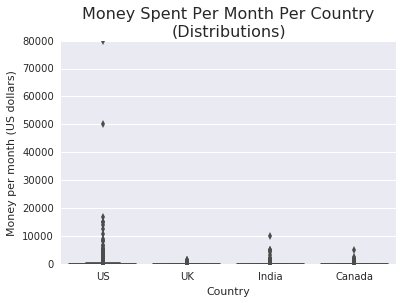

In [21]:
# Visualize the distributions again
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = data)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

The result seems little weird when we consider GDP per capita. Canada and the UK have high GDP per capita. However, on average India spends more money on their e-leaning training. It might be the data for those countries are not representative. Let's see if we have outliers

Looks like there are lots of outliers. Spending 10k a month seems extreme, but if they attended a boot camp. They could easily spend that money on the training. However they are probably not the right audience for our e-learning course since they are already committed something that big. Let's look into each groups and see what can be considered as outliers.

It's hard to see anything wrong with the UK, India, and Canada at this point. But in the US, there is a big gap after 20k. Let's remove anything after 20k. 

In [22]:
data = data[data['MoneyPerMonth'] < 20000]

Plotting again.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



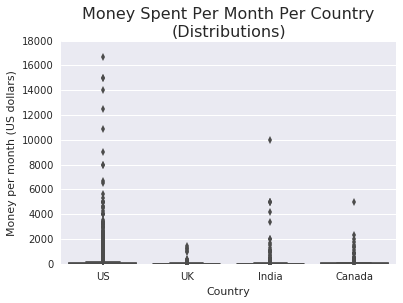

In [23]:
# Visualize the distributions again
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = data)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

What can we immediately notice is that there's big jump on Money Spent per Month around 2500 in india. Let's looks into deeper those record.

In [30]:
data[(data['CountryLive'] == 'India') & (data['MoneyPerMonth'] >= 2500)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Web,Mobile,Web_Mobile,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,True,False,True,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,True,False,True,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,True,False,True,4166.666667


None of them attended bootcamp as it appears to be on the data. It's hard to see what can possibly they spent their money on maybe except college tuition. Which is impossible to tell from the data. It's safer to drop those rows. 

In [32]:
data = data.drop(data[(data['CountryLive'] == 'India') & (data['MoneyPerMonth'] >= 2500)].index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



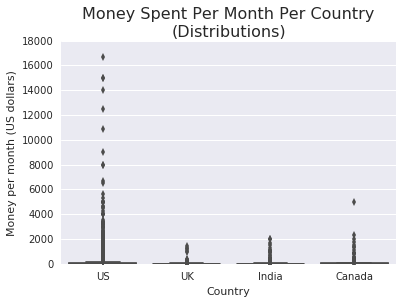

In [33]:
# Visualize the distributions again
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = data)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [34]:
data[(data['CountryLive'] == 'United States of America') & (data['MoneyPerMonth'] >= 6000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Web,Mobile,Web_Mobile,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,various conf presentations,NaN,NaN,True,False,True,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,True,False,True,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,True,True,True,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,True,False,True,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,12500.000000



Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [37]:

# Remove the respondents who didn't attendent a bootcamp
data = data.drop(data[
    (data['CountryLive'] == 'United States of America') & 
    (data['MoneyPerMonth'] >= 6000) &
    (data['AttendedBootcamp'] == 0)
].index
)


# Remove the respondents that had been programming for less than 3 months
data = data.drop(data[
    (data['CountryLive'] == 'United States of America') & 
    (data['MoneyPerMonth'] >= 6000) &
    (data['MonthsProgramming'] <= 3)
].index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



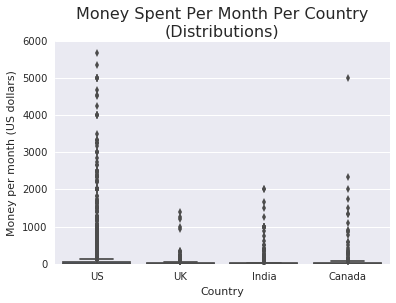

In [38]:
# Visualize the distributions again
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = data)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

In [40]:
# Examine the extreme outliers for Canada
data[(data['CountryLive'] == 'Canada') & 
    (data['MoneyPerMonth'] > 4500)]



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Web,Mobile,Web_Mobile,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,True,True,True,5000.0


Data looks little better. With that data cleansing, the mean seems to be normalized a lot. 

Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [41]:
data = data.drop(data[(data['CountryLive'] == 'Canada') & 
    (data['MoneyPerMonth'] > 4500)].index)

In [42]:
data[['CountryLive','MoneyPerMonth']].groupby(['CountryLive']).mean()

,MoneyPerMonth
CountryLive,
Canada,93.065400
India,65.758763
United Kingdom,45.534443
United States of America,142.654608


In [43]:
data['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

In [45]:
data['CountryLive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

## Choosing the Two Best Markets.

The data suggest that two best markets are the US and India considering our subscription is 59 USD per months. For that reason, the UK is not the best place because, they don't spend enough on e-learning in a month to meet that. 

First place to advertise is ovbiously the US considering its size and how much they spend on learning code on average. 

Cananda on average spend more than India, but there are more people from India than Canada. So this is not clear that which country is better to invest on. My 